In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [120]:
test_data = pd.read_csv("./test.csv", index_col="PassengerId")
train_data = pd.read_csv("./train.csv", index_col="PassengerId")

In [121]:
test_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [122]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Since this is an inspection: It is advisable to concatenate the dataset for better perception.

In [123]:
data = pd.concat([train_data, test_data])

In [124]:
data.sample(5)

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
251,NaN,NaN,S,7.2500,"Reed, Mr. James George",0,3,male,0,0.0,362316
248,24.0,NaN,S,14.5000,"Hamalainen, Mrs. William (Anna)",2,2,female,0,1.0,250649
418,18.0,NaN,S,13.0000,"Silven, Miss. Lyyli Karoliina",2,2,female,0,1.0,250652
167,NaN,E33,S,55.0000,"Chibnall, Mrs. (Edith Martha Bowerman)",1,1,female,0,1.0,113505
156,51.0,NaN,C,61.3792,"Williams, Mr. Charles Duane",1,1,male,0,0.0,PC 17597


In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    891 non-null float64
Ticket      1309 non-null object
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


In [126]:
data.describe()

,Age,Fare,Parch,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


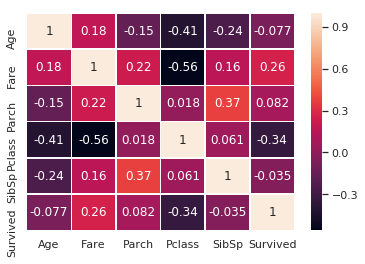

In [127]:
sns.heatmap(data.corr(), annot=True, linewidths=.6)
plt.show()

In [128]:
# Checking the amount of missing data

aggregated_data = data.isnull().sum().sort_values(ascending = False)
percent = round(data.isnull().sum().sort_values(ascending = False)/len(data)*100, 2)
pd.concat([aggregated_data, percent], axis = 1,keys= ['Total Count', 'Percent'])

,Total Count,Percent
Cabin,1014,77.46
Survived,418,31.93
Age,263,20.09
Embarked,2,0.15
Fare,1,0.08
Ticket,0,0.00
SibSp,0,0.00
Sex,0,0.00
Pclass,0,0.00
Parch,0,0.00


## Handling missing data

### Safe to drop the Cabin attribute: ~77% missing data.

#### Fill "Mean" for Fare: Only 1 entry missing.
#### Fill in "Mode" for Embarked: Only 2 entries + Attribute is categorical 
#### Age has ~20 % missing values. Unwise to drop records/attributes. => Keep records, but ignore when age is involved in analysis.

In [129]:
data.drop("Cabin", inplace=True, axis=1)
data.Fare.fillna(data.Fare.mean(), inplace=True)
data.Embarked.fillna(data.Embarked.mode()[0], inplace=True)

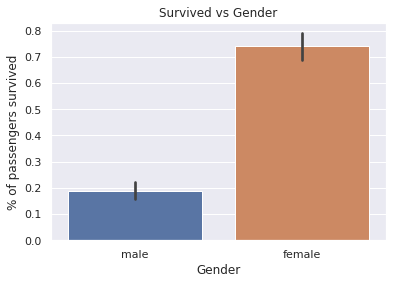

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
 
Genderwise count of Travellers
Sex
female    466
male      843
dtype: int64


In [130]:
# Gender vs Percentage survived.

ax = sns.barplot(x = "Sex", y = "Survived", data = data)
plt.title("Survived vs Gender")
plt.xlabel("Gender")
plt.ylabel("% of passengers survived")
plt.show()

survived_summary = data.groupby("Sex")
print(survived_summary.mean()["Survived"])
print(" ")
print("Genderwise count of Travellers")
print(survived_summary.apply(len))

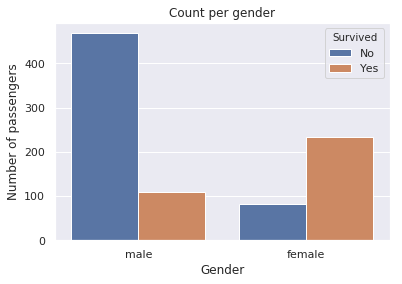

Sex     Survived
female  0.0          81
        1.0         233
male    0.0         468
        1.0         109
dtype: int64

In [131]:
# Percentage within each gender

ax = sns.countplot(data = data, x = "Sex", hue="Survived", )
plt.title("Count per gender")

plt.xlabel("Gender")
plt.ylabel("Number of passengers")

legend = ax.get_legend()
legend.set_title("Survived")
legend_text = legend.texts
legend_text[0].set_text("No")
legend_text[1].set_text("Yes")

plt.show()

data.groupby(["Sex", "Survived"]).apply(len)

#### Percentage of Female survivors is higher.

#### Shows that women were given more preference during evacuation. Even though there were more men, the number of female survivors outnumbered men who survived.

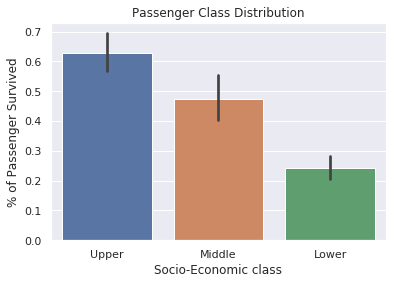

In [132]:
# Classwise inspection

sns.barplot(x = "Pclass",y = "Survived",data=data)
plt.title("Passenger Class Distribution")
plt.xlabel("Socio-Economic class");
plt.ylabel("% of Passenger Survived");
labels = ['Upper', 'Middle', 'Lower']
val = [0, 1, 2] 
plt.xticks(val, labels)
plt.show()

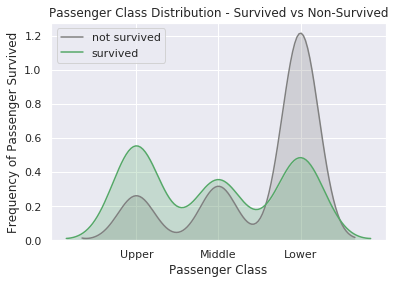

In [133]:
ax=sns.kdeplot(data.Pclass[data.Survived == 0] , 
               color='gray',
               shade=True,
               label='not survived')
ax=sns.kdeplot(data.loc[(data['Survived'] == 1),'Pclass'] , 
               color='g',
               shade=True, 
               label='survived')
plt.title('Passenger Class Distribution - Survived vs Non-Survived')
plt.ylabel("Frequency of Passenger Survived")
plt.xlabel("Passenger Class")

labels = ['Upper', 'Middle', 'Lower']
plt.xticks(sorted(data.Pclass.unique()), labels)
plt.show()

- By Inspection
    - ~ 63% first class passenger survived titanic tragedy, while 
    - ~ 48% second class and 
    - ~ only  24% third class passenger survived.

#### The first class passengers had the upper hand during the tragedy than second and third. 

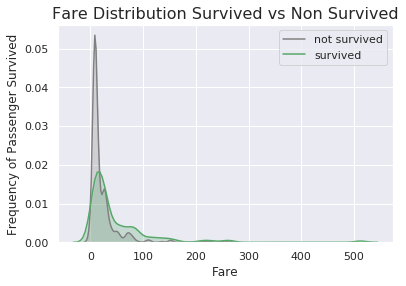

In [134]:
# Fare vs Survived Inspection

ax=sns.kdeplot(data.loc[(data['Survived'] == 0),'Fare'] , color='gray',shade=True,label='not survived')
ax=sns.kdeplot(data.loc[(data['Survived'] == 1),'Fare'] , color='g',shade=True, label='survived')
plt.title('Fare Distribution Survived vs Non Survived', fontsize = 16)
plt.ylabel("Frequency of Passenger Survived", fontsize = 12)
plt.xlabel("Fare", fontsize = 12)
plt.show()

#### Inspecting the plot:
 - The spike in the plot under 50 dollar represents that a lot of passengers who bought the ticket within that range did not survive. 
 - When fare is approximately more than 280 dollars, there is no gray shade which means, either everyone passed that fare point survived or maybe there are ouotliers that are exceptions.

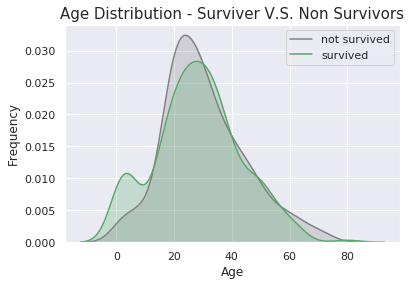

In [135]:
# Age vs Survived

ax=sns.kdeplot(data.loc[(data['Survived'] == 0),'Age'] , color='gray',shade=True,label='not survived')
ax=sns.kdeplot(data.loc[(data['Survived'] == 1),'Age'] , color='g',shade=True, label='survived')
plt.title('Age Distribution - Surviver V.S. Non Survivors', fontsize = 15)
plt.xlabel("Age", fontsize = 12)
plt.ylabel('Frequency', fontsize = 12);
plt.show()

#### Local minima in the survived curve shows that infants were prioritized during evacuation.

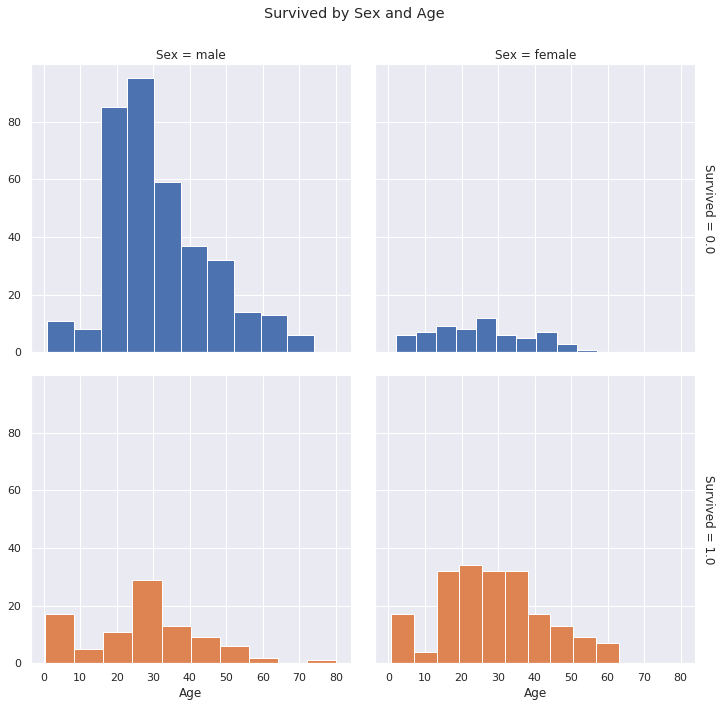

In [136]:
g = sns.FacetGrid(data,height=5, col="Sex", row="Survived", margin_titles=True, hue = "Survived")
g = g.map(plt.hist, "Age", edgecolor = 'white');
g.fig.suptitle("Survived by Sex and Age")
plt.subplots_adjust(top=0.90)
plt.show()

#### Seems that around 90% of men aged 20-30 did not survive. This shows that they were responsible for the evacuation of other passengers.

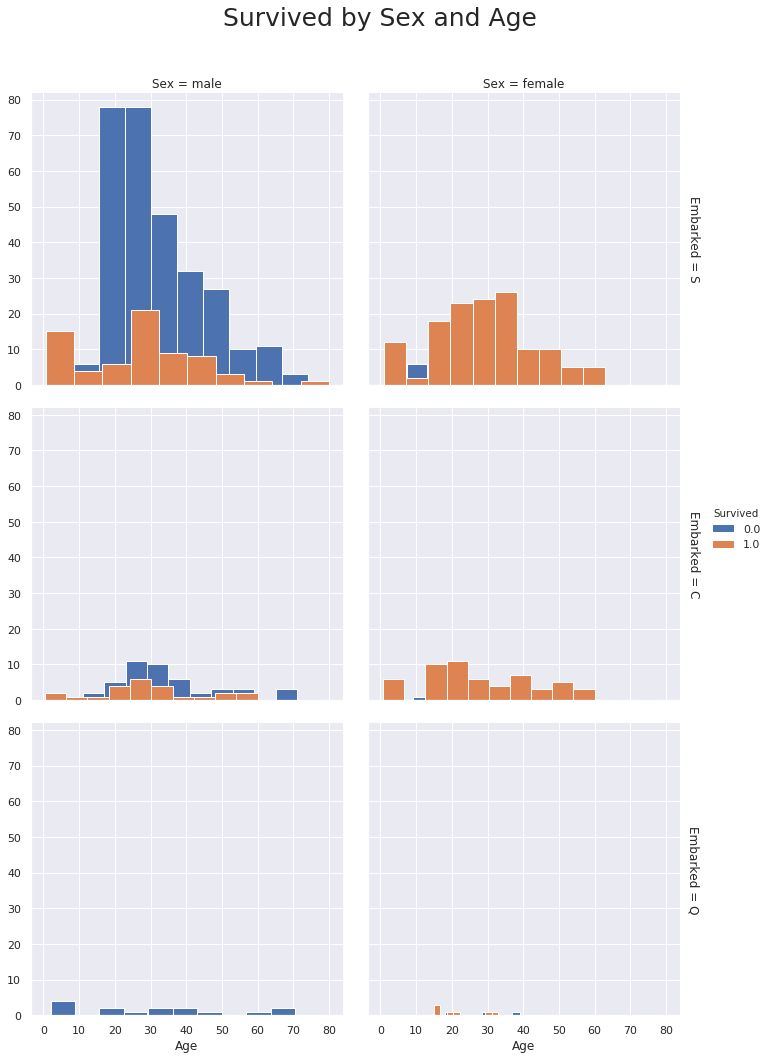

In [137]:
# Sex and Age vs Survived


g = sns.FacetGrid(data,height=5, col="Sex", row="Embarked", margin_titles=True, hue = "Survived")
g = g.map(plt.hist, "Age", edgecolor = 'white').add_legend();
g.fig.suptitle("Survived by Sex and Age", size = 25)
plt.subplots_adjust(top=0.90)
plt.show()

### Insights from the plot. 
* Most passengers seem to be boarded on Southampton(S).
* More than 60% of the passengers died boarded on Southampton. 
* More than 60% of the passengers lived boarded on Cherbourg(C).
* Pretty much every male that boarded on Queenstown(Q) did not survive. 
* There were very few females boarded on Queenstown, however, most of them survived. 

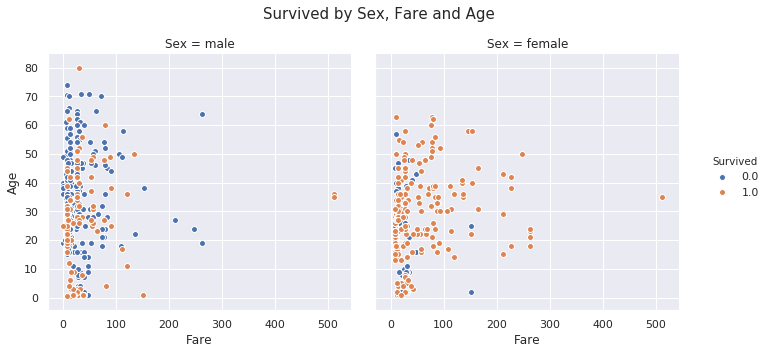

In [138]:
# Age, Fare and Sex vs Survived

g = sns.FacetGrid(data, height=5,hue="Survived", col ="Sex", margin_titles=True)
g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
g.fig.suptitle("Survived by Sex, Fare and Age", size = 15)
plt.subplots_adjust(top=0.85)
plt.show()

Insights from the plot:
* The facet grid above clearly demonstrates the three outliers with Fare of over \$500. We can discard them.
* Most of the passengers were with in the Fare range of \$100. 

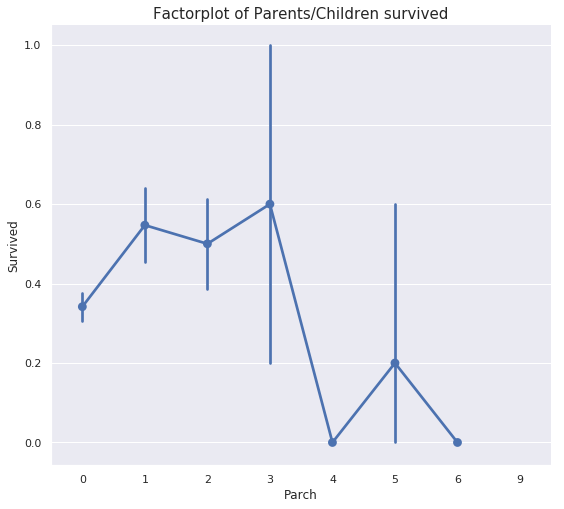

In [139]:
# Dropping outliers

data = data[data.Fare < 500]

# Size of Family vs Survival

sns.catplot(x = "Parch", y = "Survived", data = data, kind = "point",height = 8)
plt.title("Factorplot of Parents/Children survived", fontsize = 15)
plt.subplots_adjust(top=0.85)
plt.show()

#### Passenger who traveled in big groups with parents/children have really low survival rate than other passengers.

- A group a 6 travellers has 0% chance of survial.
- Solo travellers have ~35% of survival chance.

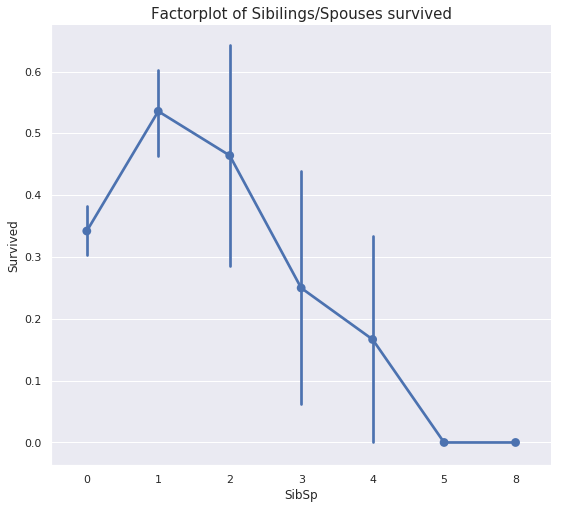

In [140]:
sns.catplot(x =  "SibSp", y = "Survived", data = data,kind = "point",height = 8)
plt.title('Factorplot of Sibilings/Spouses survived', fontsize = 15)
plt.subplots_adjust(top=0.85)
plt.show()

#### While, passenger who traveled in small groups with sibilings/spouses had more survival rate than other passengers.

### Statistical Measures

In [141]:
# Class vs Survival Chances

data[['Pclass', 'Survived']].groupby("Pclass").mean()

,Survived
Pclass,
1,0.624413
2,0.472826
3,0.242363


In [142]:
# Overview(Survived vs non survied)

survived_summary = data.groupby("Survived")
survived_summary.mean()

,Age,Fare,Parch,Pclass,SibSp
Survived,,,,,
0.0,30.626179,22.117887,0.329690,2.531876,0.553734
1.0,28.270627,44.289799,0.466077,1.958702,0.477876


In [143]:
# Classwise central tendency.

survived_summary = data.groupby("Pclass")
survived_summary.mean()

,Age,Fare,Parch,SibSp,Survived
Pclass,,,,,
1,39.133643,82.182092,0.363636,0.442006,0.624413
2,29.506705,21.179196,0.368231,0.393502,0.472826
3,24.816367,13.331087,0.400564,0.568406,0.242363
